In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
#connect to aws
dbu = DBUtil("komodo_redshift","../../databases/database.conf")

In [3]:
%%time
query = """
select ilink,
count(*) as N_Pants2018 
from jjill.jjill_keyed_data
where is_emailable_ind='Y'
and department_name = 'Pants'
and order_date between '2018-01-01' and '2018-04-30'
group by 1 order by 1;
"""
DF3 = dbu.get_df_from_query(query)
DF3.columns = map(str.upper,DF3.columns)

CPU times: user 276 ms, sys: 83.8 ms, total: 360 ms
Wall time: 4.41 s


In [4]:
DF1 = pd.read_pickle('../data/numeric_fts_2017.pkl')
DF2 = pd.read_pickle('../data/categorical2017.pkl')
DF1.columns = map(str.upper, DF1.columns)
DF2.columns = map(str.upper, DF2.columns)

In [5]:
DF = DF1.merge(DF2,on=['ILINK','DEPARTMENT_NAME'])
DF = DF.merge(DF3,how='outer',on='ILINK')

In [6]:
DF['N_PANTS2018'].fillna(0,inplace=True)

In [7]:
#print DF.shape
#DF.head(5)

In [24]:
DFPants = DF[DF.DEPARTMENT_NAME=='Pants']
X = ['%s_2017'%x for x in DFPants.columns[2:-1]]
X.insert(0,'ILINK')
X.insert(1,'DEPARTMENT_NAME')
X.insert(42,'N_PANTS2018')
DFPants.columns = X
print 'Distinct # of Customers in who purchased Pants in 2017:',DFPants.shape[0]

Distinct # of Customers in who purchased Pants in 2017: 65098


In [9]:
NUMERIC_FTS = ['TOTAL_BOUGHT_2017',
             'SHIPPED_SOLD_AMT_2017',
             'AVG_SHIPPED_SOLD_AMT_2017',
             'STD_SHIPPED_SOLD_AMT_2017',
             'VAR_SHIPPED_SOLD_AMT_2017',
             'DISCOUNT_2017',
             'AVG_DISCOUNT_2017',
             'STD_DISCOUNT_2017',
             'VAR_DISCOUNT_2017',
             'N_PANTS2018']
CATEG_FTS = ['ENDUSE_HAS_CORE_2017',
             'ENDUSE_HAS_WEAREVER_2017',
             'ENDUSE_HAS_PUREJILL_2017',
             'PAYTYPE_HAS_JJC_2017',
             'PAYTYPE_HAS_VISA_2017',
             'PAYTYPE_HAS_MC_2017',
             'PAYTYPE_HAS_AMEX_2017',
             'PAYTYPE_HAS_DISC_2017',
             'PAYTYPE_HAS_DEBIT_2017',
             'PAYTYPE_HAS_CASH_2017',
             'PAYTYPE_HAS_CK_2017',
             'PAYTYPE_HAS_OTHER_2017',
             'FABRICCATEGORY_HAS_COTTON/COTTONBL_2017',
             'FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND_2017',
             'FABRICCATEGORY_HAS_LINEN/LINENBL_2017',
             'ENDUSE_%_CORE_2017',
             'ENDUSE_%_WEAREVER_2017',
             'ENDUSE_%_PUREJILL_2017',
             'PAYTYPE_%_JJC_2017',
             'PAYTYPE_%_VISA_2017',
             'PAYTYPE_%_MC_2017',
             'PAYTYPE_%_AMEX_2017',
             'PAYTYPE_%_DISC_2017',
             'PAYTYPE_%_DEBIT_2017',
             'PAYTYPE_%_CASH_2017',
             'PAYTYPE_%_CK_2017',
             'PAYTYPE_%_OTHER_2017',
             'FABRICCATEGORY_%_COTTON/COTTONBL_2017',
             'FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017',
             'FABRICCATEGORY_%_LINEN/LINENBL_2017','N_PANTS2018']
CATEG_FTS = map(str.upper,CATEG_FTS)

In [10]:
DFPants.head()

,ILINK,DEPARTMENT_NAME,TOTAL_BOUGHT_2017,SHIPPED_SOLD_AMT_2017,AVG_SHIPPED_SOLD_AMT_2017,STD_SHIPPED_SOLD_AMT_2017,VAR_SHIPPED_SOLD_AMT_2017,DISCOUNT_2017,AVG_DISCOUNT_2017,STD_DISCOUNT_2017,VAR_DISCOUNT_2017,ENDUSE_HAS_CORE_2017,ENDUSE_HAS_WEAREVER_2017,ENDUSE_HAS_PUREJILL_2017,PAYTYPE_HAS_JJC_2017,PAYTYPE_HAS_VISA_2017,PAYTYPE_HAS_MC_2017,PAYTYPE_HAS_AMEX_2017,PAYTYPE_HAS_DISC_2017,PAYTYPE_HAS_DEBIT_2017,PAYTYPE_HAS_CASH_2017,PAYTYPE_HAS_CK_2017,PAYTYPE_HAS_OTHER_2017,FABRICCATEGORY_HAS_COTTON/COTTONBL_2017,FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_HAS_LINEN/LINENBL_2017,ENDUSE_%_CORE_2017,ENDUSE_%_WEAREVER_2017,ENDUSE_%_PUREJILL_2017,PAYTYPE_%_JJC_2017,PAYTYPE_%_VISA_2017,PAYTYPE_%_MC_2017,PAYTYPE_%_AMEX_2017,PAYTYPE_%_DISC_2017,PAYTYPE_%_DEBIT_2017,PAYTYPE_%_CASH_2017,PAYTYPE_%_CK_2017,PAYTYPE_%_OTHER_2017,FABRICCATEGORY_%_COTTON/COTTONBL_2017,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_%_LINEN/LINENBL_2017,N_PANTS2018
0,0000000004,Pants,9.0,378.84,42.093333,15.642059,244.674025,208.10,23.122222,3.723835,13.866944,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.556,0.444,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.444,0.0,0.0
3,0000000023,Pants,1.0,27.99,27.990000,NaN,NaN,12.00,12.000000,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0
7,0000000049,Pants,3.0,123.32,41.106667,35.605170,1267.728133,54.68,18.226667,15.797726,249.568133,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
9,0000000088,Pants,2.0,124.60,62.300000,0.000000,0.000000,53.40,26.700000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000,0.000,0.0,0.0
11,0000000118,Pants,8.0,393.64,49.205000,10.663724,113.715000,198.36,24.795000,5.371951,28.857857,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.875,0.000,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.000,0.0,1.0


In [148]:
DFPants.to_pickle('../data/DFPants.pkl')

# Pants Customers Only

## Numeric Fts Correlations/Scatter Matrix

,TOTAL_BOUGHT_2017,N_PANTS2018
TOTAL_BOUGHT_2017,1.000000,0.459049
N_PANTS2018,0.459049,1.000000


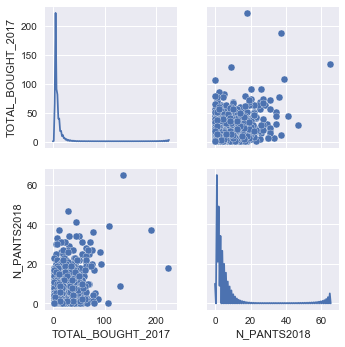

In [11]:
fts = [NUMERIC_FTS[0]]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,SHIPPED_SOLD_AMT_2017,AVG_SHIPPED_SOLD_AMT_2017,STD_SHIPPED_SOLD_AMT_2017,VAR_SHIPPED_SOLD_AMT_2017,N_PANTS2018
SHIPPED_SOLD_AMT_2017,1.000000,0.132843,0.226095,0.115816,0.450321
AVG_SHIPPED_SOLD_AMT_2017,0.132843,1.000000,0.116595,0.101664,-0.008901
STD_SHIPPED_SOLD_AMT_2017,0.226095,0.116595,1.000000,0.921498,0.087158
VAR_SHIPPED_SOLD_AMT_2017,0.115816,0.101664,0.921498,1.000000,0.033450
N_PANTS2018,0.450321,-0.008901,0.087158,0.033450,1.000000


/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


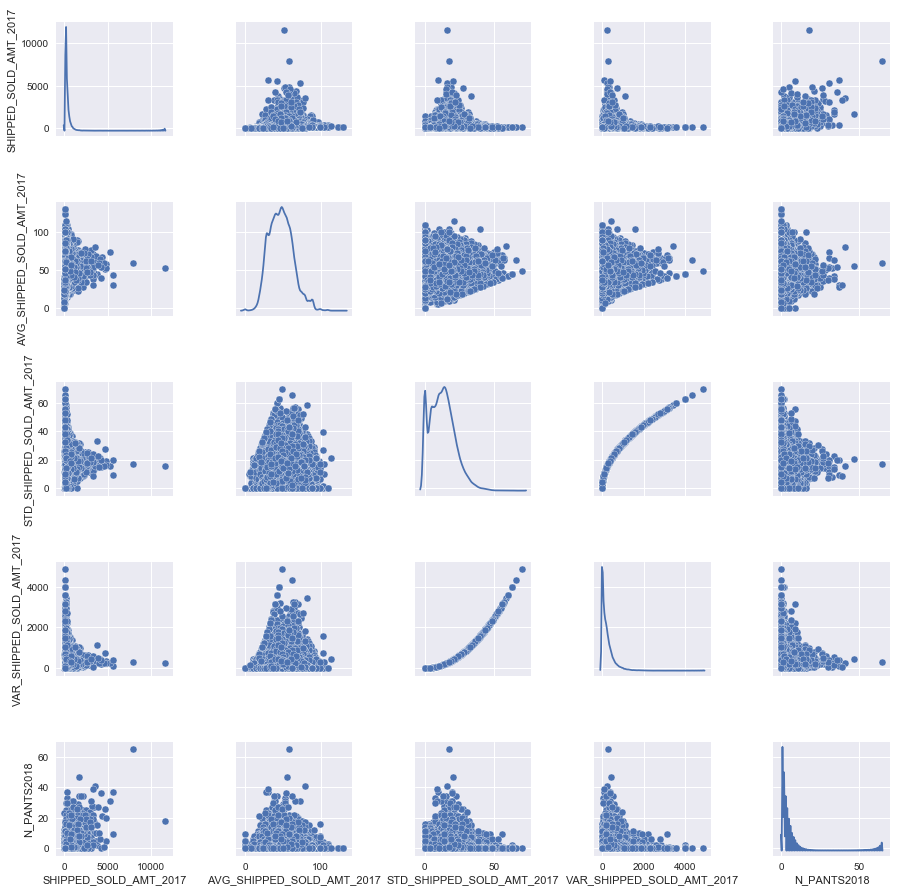

In [12]:
fts = NUMERIC_FTS[1:5]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,DISCOUNT_2017,AVG_DISCOUNT_2017,STD_DISCOUNT_2017,VAR_DISCOUNT_2017,N_PANTS2018
DISCOUNT_2017,1.000000,0.244896,0.186049,0.079668,0.440649
AVG_DISCOUNT_2017,0.244896,1.000000,0.029591,0.018185,0.022140
STD_DISCOUNT_2017,0.186049,0.029591,1.000000,0.923233,0.093069
VAR_DISCOUNT_2017,0.079668,0.018185,0.923233,1.000000,0.040654
N_PANTS2018,0.440649,0.022140,0.093069,0.040654,1.000000


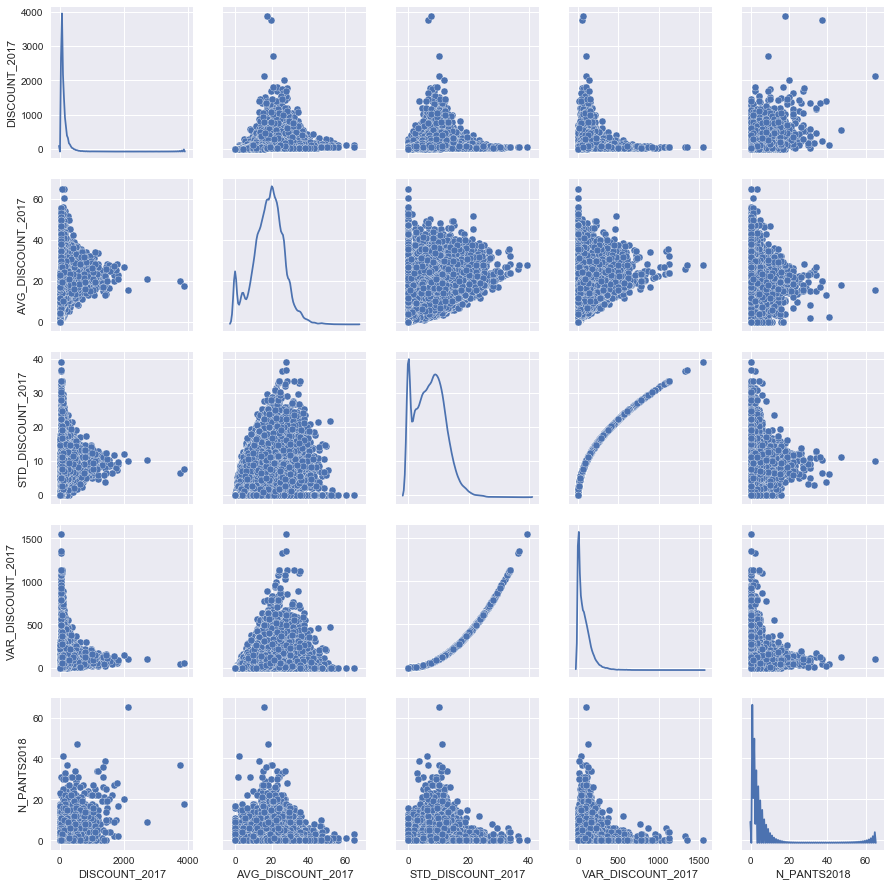

In [13]:
fts = NUMERIC_FTS[5:]
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

## Categorical Fts Correlation/Scatter Matrix

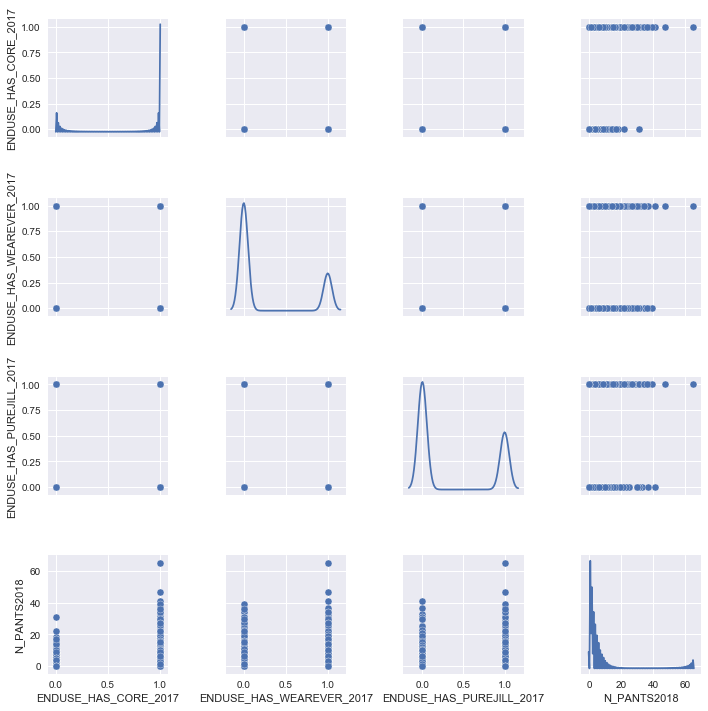

In [14]:
fts = CATEG_FTS[0:3]+['N_PANTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

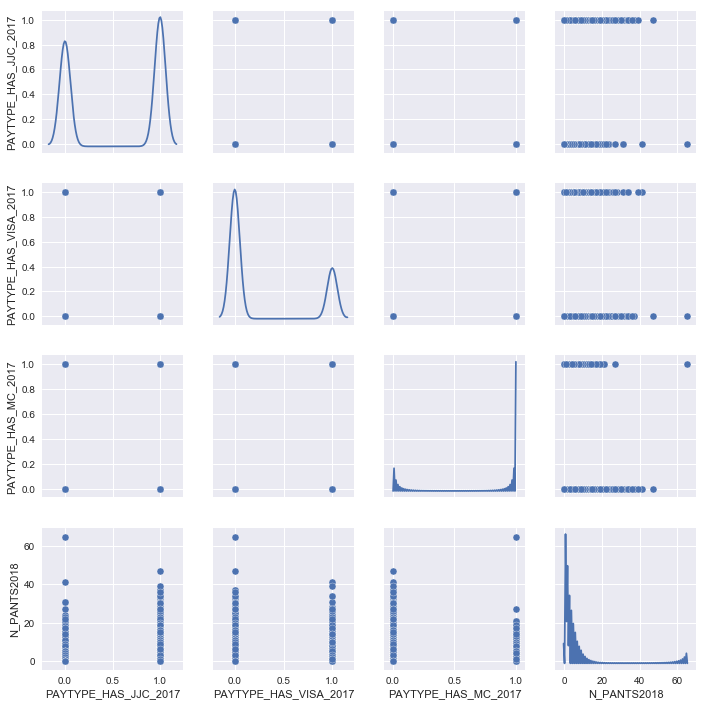

In [15]:
fts = CATEG_FTS[3:6]+['N_PANTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

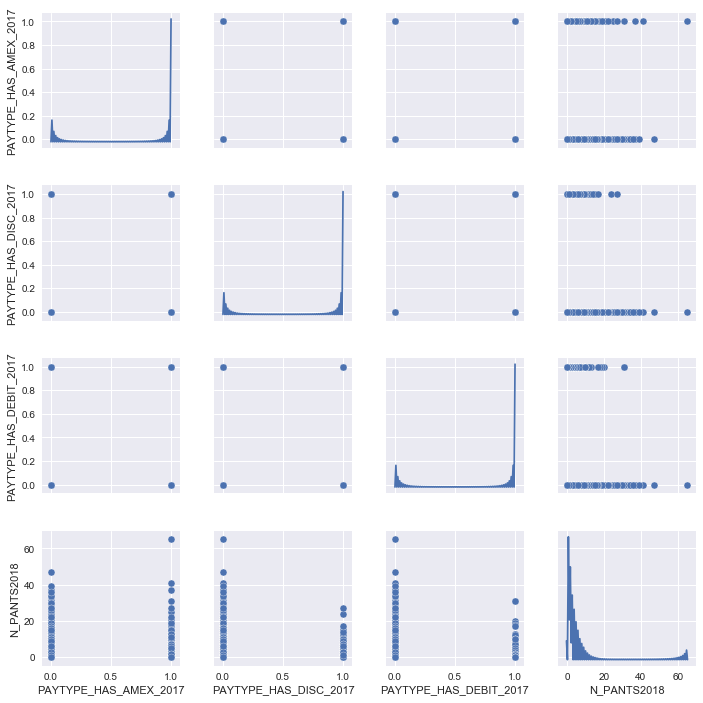

In [16]:
fts = CATEG_FTS[6:9]+['N_PANTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

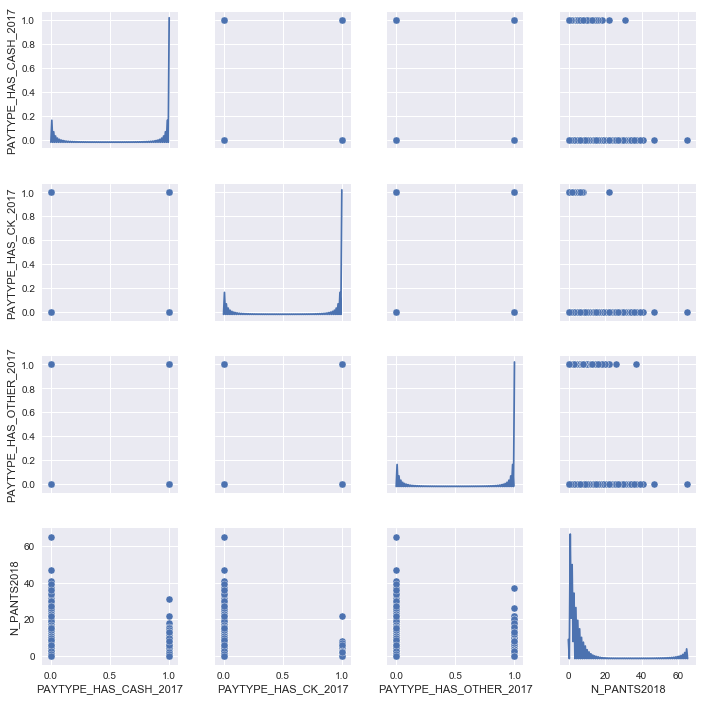

In [17]:
fts = CATEG_FTS[9:12]+['N_PANTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

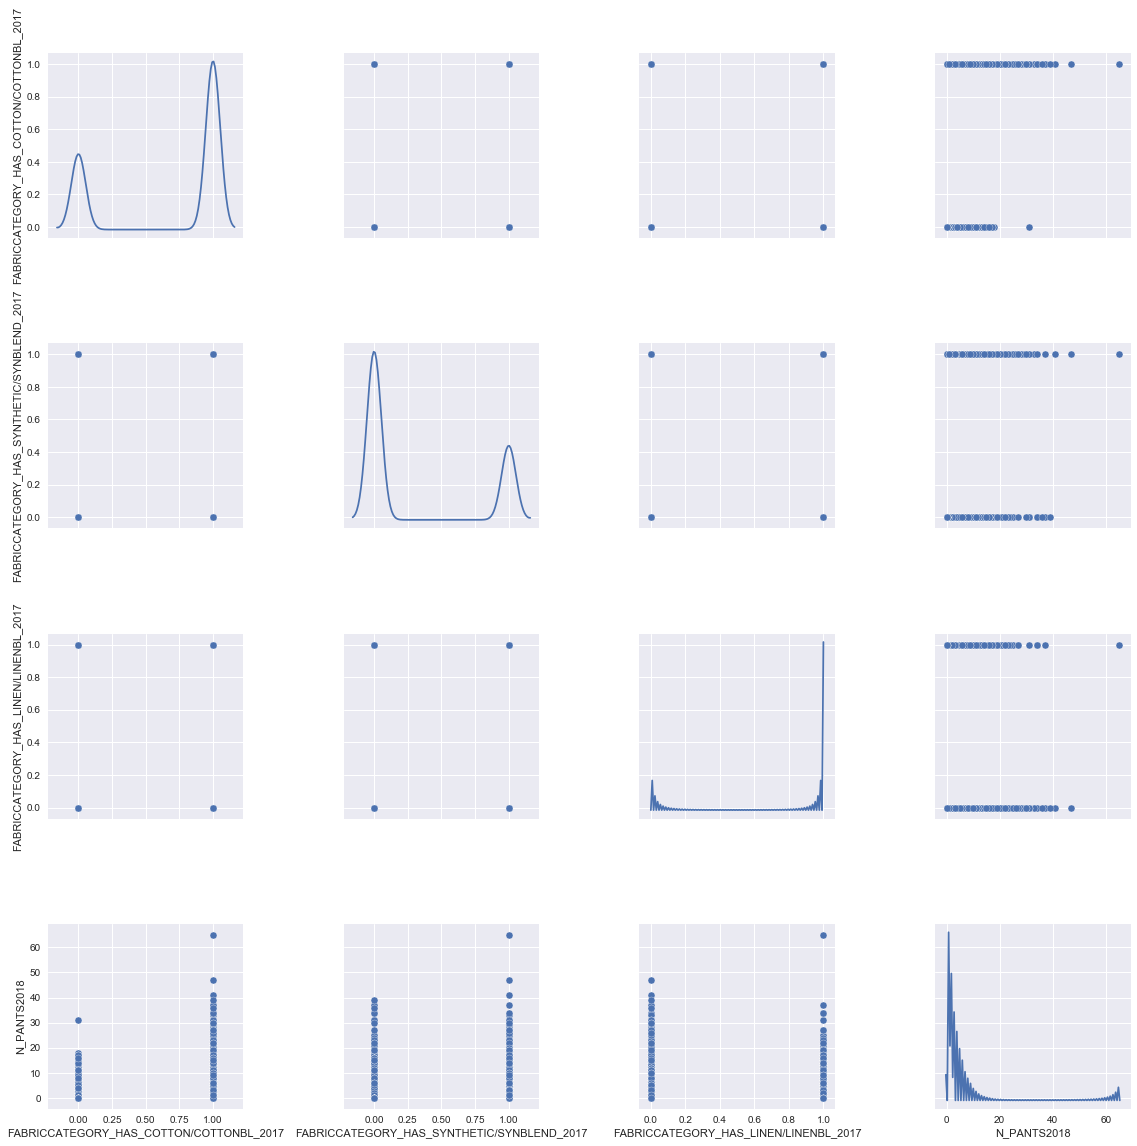

In [18]:
fts = CATEG_FTS[12:15]+['N_PANTS2018']
#display(DFPants[fts].corr())
g = sns.pairplot(DFPants,vars=fts,diag_kind='kde',size=4);

,ENDUSE_%_CORE_2017,ENDUSE_%_WEAREVER_2017,ENDUSE_%_PUREJILL_2017,N_PANTS2018
ENDUSE_%_CORE_2017,1.000000,-0.612231,-0.709413,-0.021182
ENDUSE_%_WEAREVER_2017,-0.612231,1.000000,-0.122940,-0.011350
ENDUSE_%_PUREJILL_2017,-0.709413,-0.122940,1.000000,0.036711
N_PANTS2018,-0.021182,-0.011350,0.036711,1.000000


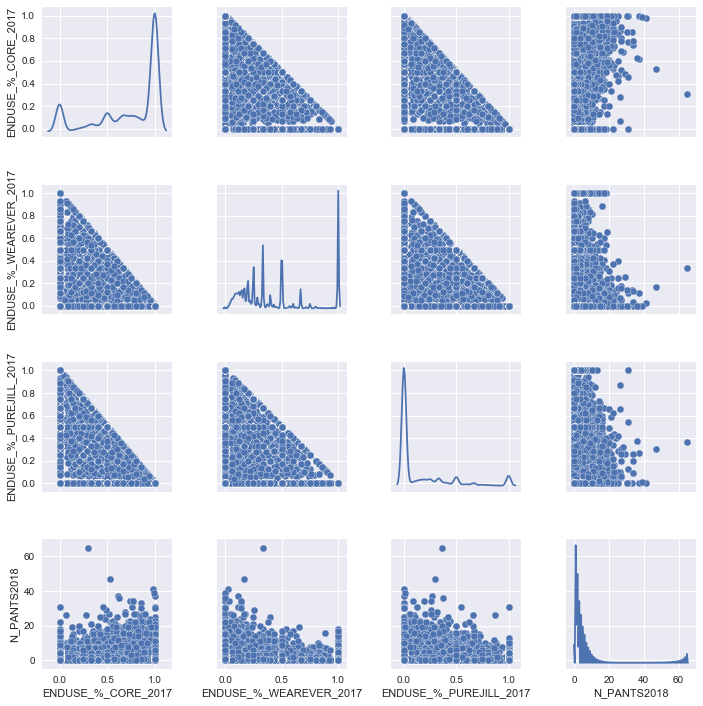

In [19]:
fts = CATEG_FTS[15:18]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,PAYTYPE_%_JJC_2017,PAYTYPE_%_VISA_2017,PAYTYPE_%_MC_2017,N_PANTS2018
PAYTYPE_%_JJC_2017,1.000000,-0.604981,-0.361542,0.103783
PAYTYPE_%_VISA_2017,-0.604981,1.000000,-0.174631,-0.062985
PAYTYPE_%_MC_2017,-0.361542,-0.174631,1.000000,-0.035855
N_PANTS2018,0.103783,-0.062985,-0.035855,1.000000


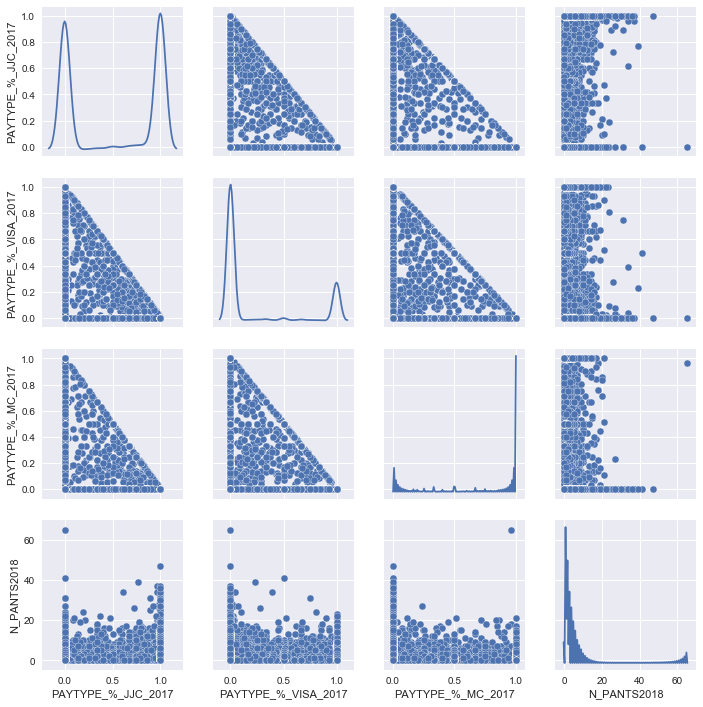

In [20]:
fts = CATEG_FTS[18:21]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,PAYTYPE_%_AMEX_2017,PAYTYPE_%_DISC_2017,PAYTYPE_%_DEBIT_2017,N_PANTS2018
PAYTYPE_%_AMEX_2017,1.000000,-0.035886,-0.037039,-0.018677
PAYTYPE_%_DISC_2017,-0.035886,1.000000,-0.018681,-0.015047
PAYTYPE_%_DEBIT_2017,-0.037039,-0.018681,1.000000,-0.030537
N_PANTS2018,-0.018677,-0.015047,-0.030537,1.000000


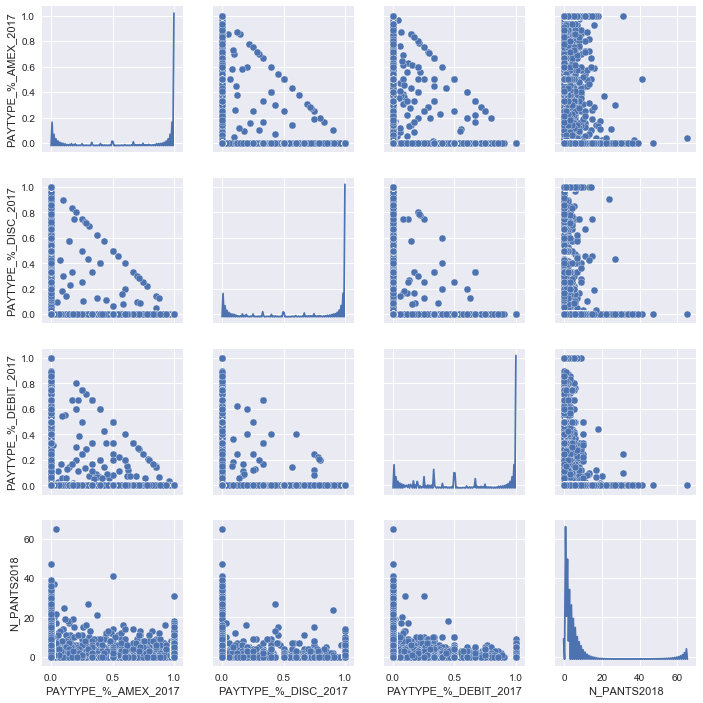

In [21]:
fts = CATEG_FTS[21:24]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,PAYTYPE_%_CASH_2017,PAYTYPE_%_CK_2017,PAYTYPE_%_OTHER_2017,N_PANTS2018
PAYTYPE_%_CASH_2017,1.000000,0.005440,-0.005019,-0.017201
PAYTYPE_%_CK_2017,0.005440,1.000000,-0.001821,-0.001664
PAYTYPE_%_OTHER_2017,-0.005019,-0.001821,1.000000,-0.021793
N_PANTS2018,-0.017201,-0.001664,-0.021793,1.000000


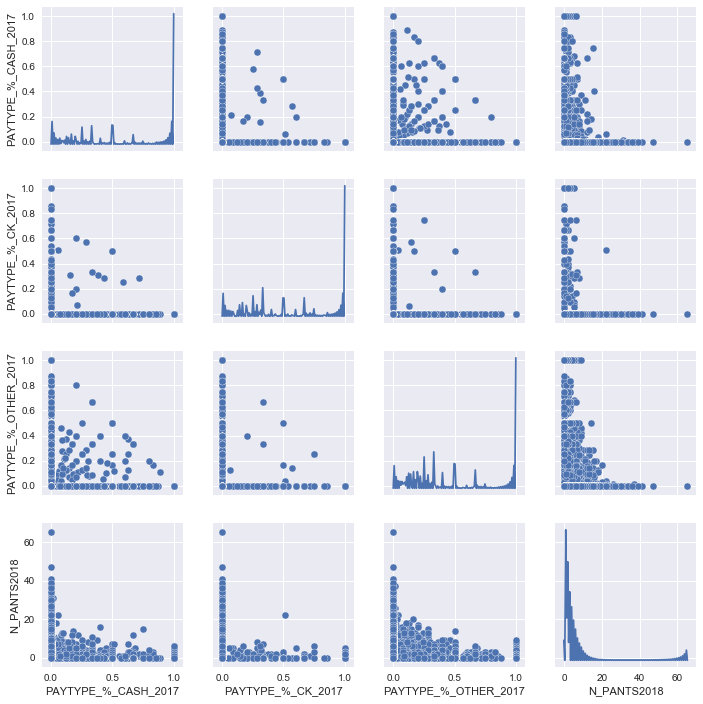

In [22]:
fts = CATEG_FTS[24:27]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,FABRICCATEGORY_%_COTTON/COTTONBL_2017,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_%_LINEN/LINENBL_2017,N_PANTS2018
FABRICCATEGORY_%_COTTON/COTTONBL_2017,1.000000,-0.358969,-0.252887,0.031441
FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,-0.358969,1.000000,-0.108754,-0.007148
FABRICCATEGORY_%_LINEN/LINENBL_2017,-0.252887,-0.108754,1.000000,-0.033334
N_PANTS2018,0.031441,-0.007148,-0.033334,1.000000


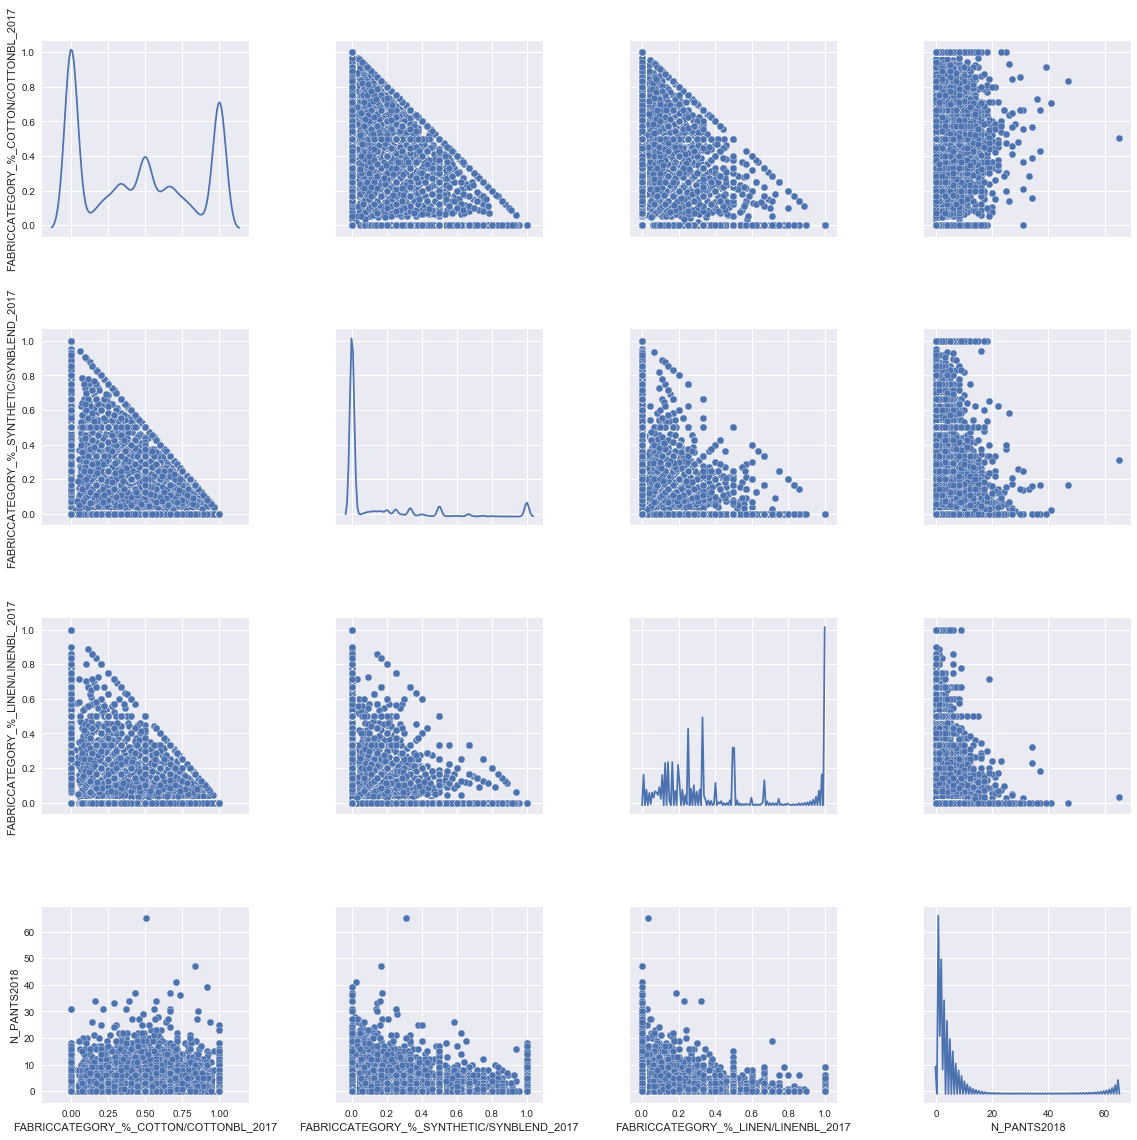

In [23]:
fts = CATEG_FTS[27:30]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde',size=4);